# Case Study: How Does a Bike-Share Navigate Speedy Success?

This case study is part of the [Google Data Analytics Professional Certificate](https://www.credly.com/badges/9483b79a-9dae-4ebb-be1f-d4a547cbb914/public_url)

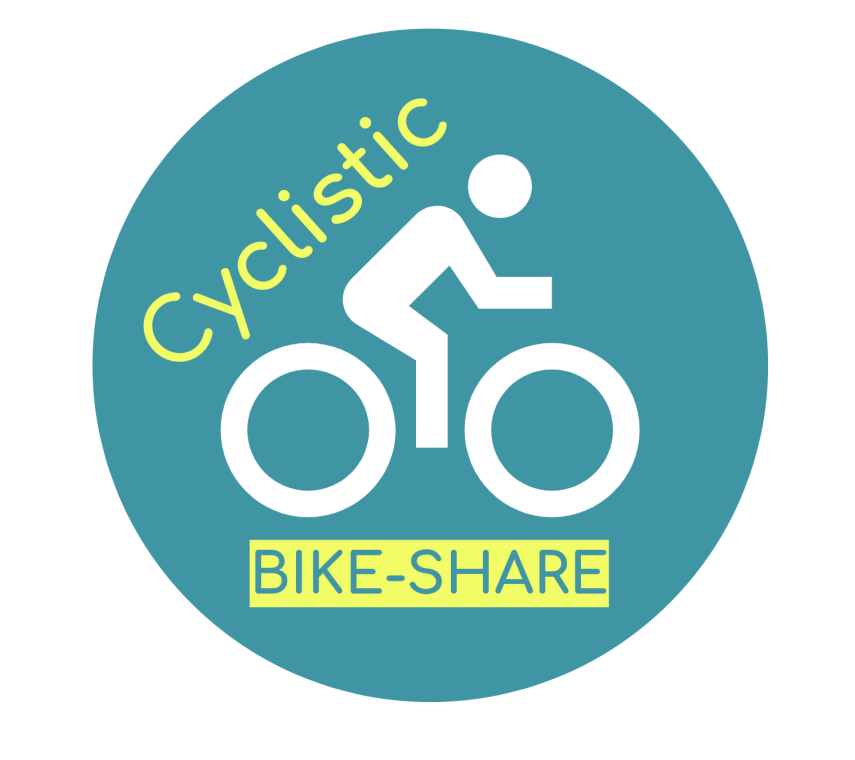

## Executive Summary

The goal of this project is to **increase the number of annual memberships** to Cyclistic's bike-sharing program by **identifying differenes in usage trends** between current members and casual users. The KPI measured is **number of new annual members from existing casual users**. Based on the findings, I recommended (1) creating blog posts to promote the benefits of commute by bike and (2) suggesting 30+-minute bike routes to convert casual users.


## 1. Introduction

Cyclistic is a (fictional) biking sharing program in Chicago, with 5800+ bicycle and 600+ docking stations. To make bike-share more inclusive to people with disabilities and bikers who can't use a standard two-wheeled bike, Cyclistic also offers reclining bikes, hand tricycles and cargo bikes. To build general awareness and appeal to broad consumer segments, Cyclistic also has flexible pricing plans: single-ride passes, full-day passes and annual memberships.

Based on previous market research that showed annual members are more profitable than casual riders, the Marketing Director believes that the company's success depends on **maximizing the number of annual memberships**. The KPI for this case study is **number of new annual members from existing casual users**. Before designing a new marketing strategy to convert casual riders into annual members, I, as a junior marketing analyst, have to present recommendations backed with compelling data insights and professional data visualizations to the following stakeholders:
* Marketing Director
* Marketing Analytics Team
* Executive Team

## 2. Key Question

To determine the future marketing strategy, the marketing analytics team first asked the following questions:

1. How do annual members and casual riders use Cyclistic bikes differently? (**focus of this case study**)
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

## 3. Data Preparation

In order to address the key business question, *how to maximize the number of annual memberships by understanding how annual members and casual riders use Cyclistic bikes differently*, the previous 12 months of Cyclistic trip data (csv files) is used. 

Data used in this case study has been made available by Motivate International Inc. under this [license](https://ride.divvybikes.com/data-license-agreement), and is downloaded from [here](https://divvy-tripdata.s3.amazonaws.com/index.html). This is public data that can be used to explore how different customer types are using Cyclistic bikes, but data-privacy issues prohibit the user of riders' personally identifiable information. 

To answer *how annual members and casual riders use Cyclistic bikes differently*, a few things can be measured:
* how long do different types of users use the bikes for each ride? (ride length)
* on what day of the week do different types of users rent the bikes? assuming that users use the bikes on weekday to commute and on the weekends for leisure. 
* which type of bikes do they use?
* does the usage of bikes differ between warmer and colder months?

## 4. Data Processing

The trip data collected contains the following information:
* the date and time of the beginning and end of each ride 
* start station name and id
* end station name and id
* member type 

To process the data for analysis, the columns "ride_length" and "day_of_week" will be added to the trip data for each month (27 files in total; from 2020-04 to 2022-06)


In [1]:
import numpy as np
import pandas as pd
import glob

# load and merge all csv files for tripdata 
path = '/Users/Vanessa/Data_Portfolio/Case_Study_1_Cyclistic/RawData/trip_data_csv/'
all_files = glob.glob(path + "/*.csv")

dataframe = []

for file in all_files:
    df = pd.read_csv(file, index_col=None)
    dataframe.append(df)

trip_data_all = pd.concat(dataframe, axis=0, join='outer', ignore_index=True)


In [2]:
# check data type 
trip_data_all['ended_at'].dtypes
trip_data_all['started_at'].dtypes
# convert from object str to datetime 
trip_data_all['ended_at'] = pd.to_datetime(trip_data_all['ended_at'], format = "%Y/%m/%d %H:%M:%S")
trip_data_all['started_at'] = pd.to_datetime(trip_data_all['started_at'], format = "%Y/%m/%d %H:%M:%S")

In [3]:
# add 2 columns to the dataframe: ride_duration and day_of_week
from datetime import datetime
import calendar
# convert datetime difference from seconds to minutes
ride_duration = trip_data_all['ended_at'] - trip_data_all['started_at']
trip_data_all['ride_duration'] = ride_duration.dt.seconds / 60
# compute day_of_week based on date
# 0 is Sunday, 6 is Saturday
trip_data_all['day_of_week'] = trip_data_all['started_at'].dt.strftime('%w') 
# convert from object to int
trip_data_all['day_of_week'] = trip_data_all['day_of_week'].astype('int') 

In [4]:
print(trip_data_all.head())
print(trip_data_all.shape)
# trip_data_all contains 10988591 rows and 15 columns
# remove duplicates and null values from trip_data_all
trip_data_all.drop_duplicates
trip_data_all.dropna

            ride_id  rideable_type          started_at            ended_at  \
0  BD0A6FF6FFF9B921  electric_bike 2020-11-01 13:36:00 2020-11-01 13:45:40   
1  96A7A7A4BDE4F82D  electric_bike 2020-11-01 10:03:26 2020-11-01 10:14:45   
2  C61526D06582BDC5  electric_bike 2020-11-01 00:34:05 2020-11-01 01:03:06   
3  E533E89C32080B9E  electric_bike 2020-11-01 00:45:16 2020-11-01 00:54:31   
4  1C9F4EF18C168C60  electric_bike 2020-11-01 15:43:25 2020-11-01 16:16:52   

          start_station_name start_station_id          end_station_name  \
0      Dearborn St & Erie St            110.0    St. Clair St & Erie St   
1  Franklin St & Illinois St            672.0  Noble St & Milwaukee Ave   
2  Lake Shore Dr & Monroe St             76.0      Federal St & Polk St   
3   Leavitt St & Chicago Ave            659.0   Stave St & Armitage Ave   
4        Buckingham Fountain              2.0       Buckingham Fountain   

  end_station_id  start_lat  start_lng    end_lat    end_lng member_casual  \
0 

<bound method DataFrame.dropna of                    ride_id  rideable_type          started_at  \
0         BD0A6FF6FFF9B921  electric_bike 2020-11-01 13:36:00   
1         96A7A7A4BDE4F82D  electric_bike 2020-11-01 10:03:26   
2         C61526D06582BDC5  electric_bike 2020-11-01 00:34:05   
3         E533E89C32080B9E  electric_bike 2020-11-01 00:45:16   
4         1C9F4EF18C168C60  electric_bike 2020-11-01 15:43:25   
...                    ...            ...                 ...   
10988586  EF56D7D1D612AC11  electric_bike 2021-05-20 16:32:14   
10988587  745191CB9F21DE3C   classic_bike 2021-05-29 16:40:37   
10988588  428575BAA5356BFF  electric_bike 2021-05-31 14:24:54   
10988589  FC8A4A7AB7249662  electric_bike 2021-05-25 16:01:33   
10988590  E873B8AA3EE84678    docked_bike 2021-05-12 12:22:14   

                    ended_at               start_station_name  \
0        2020-11-01 13:45:40            Dearborn St & Erie St   
1        2020-11-01 10:14:45        Franklin St & Illin

## 5. Data Analysis and visualization

After making sure the data is clean (free of duplicates and null values), I will get some descriptive statistics of the dataset:
* the compositon of user (% of member & % of casual users)
* which day of the week is the most popular? (mode of day_of_week)
* how long do users rent for the bikes for? (mean, max, std of ride_duration)
* the type of bikes used

and explore these variables for (i) both members and casual users, and (ii) during the week and on the weekends.

In [5]:
# percentage of member and casual users
member = (trip_data_all['member_casual'].loc[trip_data_all['member_casual']=='member'].count()/trip_data_all['member_casual'].count())*100
print('percent of users (member)', round(member,2),'%')
casual = (trip_data_all['member_casual'].loc[trip_data_all['member_casual']=='casual'].count()/trip_data_all['member_casual'].count())*100
print('percent of users (casual)', round(casual,2),'%')

percent of users (member) 56.75 %
percent of users (casual) 43.25 %


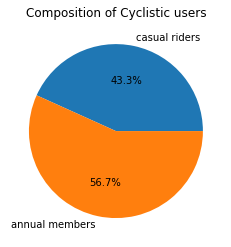

In [6]:
import matplotlib.pyplot as plt

labels = 'casual riders', 'annual members'
sizes = [casual, member]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Composition of Cyclistic users')
plt.show()


In [7]:
# descriptive statistics for ride_duration
trip_data_all['ride_duration'].describe()

count    1.098859e+07
mean     2.203790e+01
std      5.972430e+01
min      0.000000e+00
25%      6.900000e+00
50%      1.245000e+01
75%      2.293333e+01
max      1.439983e+03
Name: ride_duration, dtype: float64

In [8]:
# most popular day(s) of the week
trip_data_all['day_of_week'].mode()

0    6
Name: day_of_week, dtype: int64

In [9]:
# average ride_duration for member and casual users during the week and on weekends
ride_duration_member_weekday = trip_data_all['ride_duration'].loc[((trip_data_all['member_casual'] == 'member') & (trip_data_all['day_of_week'] != 0) & (trip_data_all['day_of_week'] != 6))].mean()
print('avg ride duration for members on a weekday:', round(ride_duration_member_weekday,2),'minutes')
ride_duration_member_weekend = trip_data_all['ride_duration'].loc[((trip_data_all['member_casual'] == 'member') & (trip_data_all['day_of_week'] == 0) | (trip_data_all['day_of_week'] == 6))].mean()
print('avg ride duration for members on weekends:', round(ride_duration_member_weekend,2),'minutes')
ride_duration_casual_weekday = trip_data_all['ride_duration'].loc[((trip_data_all['member_casual'] == 'casual') & (trip_data_all['day_of_week'] != 0) & (trip_data_all['day_of_week'] != 6))].mean()
print('avg ride duration for casual riders on a weekday:', round(ride_duration_casual_weekday,2),'minutes')
ride_duration_casual_weekend = trip_data_all['ride_duration'].loc[((trip_data_all['member_casual'] == 'casual') & (trip_data_all['day_of_week'] == 0) | (trip_data_all['day_of_week'] == 6))].mean()
print('avg ride duration for casual riders on weekends:', round(ride_duration_casual_weekend,2),'minutes')

avg ride duration for members on a weekday: 14.86 minutes
avg ride duration for members on weekends: 23.62 minutes
avg ride duration for casual riders on a weekday: 28.18 minutes
avg ride duration for casual riders on weekends: 28.77 minutes


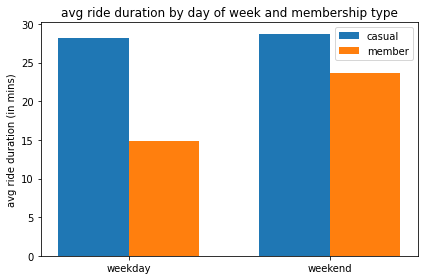

In [10]:
labels = 'weekday', 'weekend'
x = np.arange(len(labels))  # the label locations

casual = [ride_duration_casual_weekday, ride_duration_casual_weekend]
member = [ride_duration_member_weekday, ride_duration_member_weekend]

width = 0.35  # the width of the bars

plt.bar(x - width/2, casual, width, label='casual')
plt.bar(x + width/2, member, width, label='member')

plt.xticks(x, labels)
plt.ylabel('avg ride duration (in mins)')
plt.title('avg ride duration by day of week and membership type')
plt.legend()
plt.tight_layout()

In [11]:
# frequency of rides on a weekday for members
freq_rides_member_weekday = (trip_data_all['ride_duration'].loc[((trip_data_all['member_casual'] == 'member') & (trip_data_all['day_of_week'] != 0) & (trip_data_all['day_of_week'] != 6))].count()) / 7 
print('avg # of rides from members per week on a weekday:',int(freq_rides_member_weekday))
# frequency of rides on a weekend for members
freq_rides_member_weekend = (trip_data_all['ride_duration'].loc[((trip_data_all['member_casual'] == 'member') & (trip_data_all['day_of_week'] == 0) | (trip_data_all['day_of_week'] == 6))].count()) / 7
print('avg # of rides from members per week on a weekend:',int(freq_rides_member_weekend))
# frequency of rides on a weekday for casual users
freq_rides_casual_weekday = (trip_data_all['ride_duration'].loc[((trip_data_all['member_casual'] == 'casual') & (trip_data_all['day_of_week'] != 0) & (trip_data_all['day_of_week'] != 6))].count()) / 7 
print('avg # of rides from casual users per week on a weekday:',int(freq_rides_casual_weekday))
# frequency of rides on a weekend for casual users
freq_rides_casual_weekend = (trip_data_all['ride_duration'].loc[((trip_data_all['member_casual'] == 'casual') & (trip_data_all['day_of_week'] == 0) | (trip_data_all['day_of_week'] == 6))].count()) / 7 
print('avg # of rides from casual users per week on a weekend:',int(freq_rides_casual_weekend))


avg # of rides from members per week on a weekday: 652875
avg # of rides from members per week on a weekend: 386557
avg # of rides from casual users per week on a weekday: 403757
avg # of rides from casual users per week on a weekend: 402124


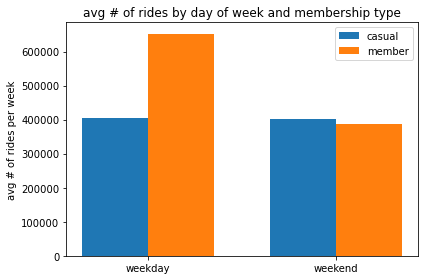

In [12]:
labels = 'weekday', 'weekend'
x = np.arange(len(labels))  # the label locations

casual = [freq_rides_casual_weekday, freq_rides_casual_weekend]
member = [freq_rides_member_weekday, freq_rides_member_weekend]

width = 0.35  # the width of the bars

plt.bar(x - width/2, casual, width, label='casual')
plt.bar(x + width/2, member, width, label='member')

plt.xticks(x, labels)
plt.ylabel('avg # of rides per week')
plt.title('avg # of rides by day of week and membership type')
plt.legend()
plt.tight_layout()

In [13]:
# type of bikes provided by Cyclistic
print(trip_data_all.rideable_type.unique().tolist())

['electric_bike', 'docked_bike', 'classic_bike']


In [14]:
# type of bikes used by members 
rideable_type_members = (trip_data_all['rideable_type'].loc[trip_data_all['member_casual'] == 'member'].groupby(by=trip_data_all.rideable_type).count()) / (trip_data_all['rideable_type'].loc[trip_data_all['member_casual'] == 'member'].count())
print(rideable_type_members)
# type of bikes rented by casual users
rideable_type_casual = (trip_data_all['rideable_type'].loc[trip_data_all['member_casual'] == 'casual'].groupby(by=trip_data_all.rideable_type).count()) / (trip_data_all['rideable_type'].loc[trip_data_all['member_casual'] == 'casual'].count())
print(rideable_type_casual)


rideable_type
classic_bike     0.448367
docked_bike      0.231227
electric_bike    0.320405
Name: rideable_type, dtype: float64
rideable_type
classic_bike     0.351805
docked_bike      0.313444
electric_bike    0.334751
Name: rideable_type, dtype: float64


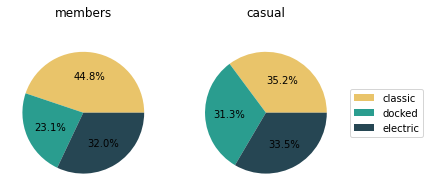

In [15]:
fig = plt.figure()
# pie chart 1 showing the fraction of bike types used by members
ax1 = fig.add_subplot(121)
labels = 'classic', 'docked', 'electric'
colors = ['#e9c46a', '#2a9d8f', '#264653']
ax1.pie(rideable_type_members, colors=colors, autopct = '%1.1f%%')
ax1.set_title('members', pad = 20)
# pie chart 2 showing the fraction of bike types used by casual users
ax2 = fig.add_subplot(122)
ax2.pie(rideable_type_casual, colors=colors, autopct = '%1.1f%%')
ax2.set_title('casual', pad = 20)
# legend
fig.legend(labels, loc ='center right', bbox_to_anchor=(1.1,0.5))
plt.show()

In [16]:
# ride length per bike type
ride_length_rideable_type_members_mean = trip_data_all[['rideable_type','ride_duration']].loc[trip_data_all['member_casual'] == 'member'].groupby(by=trip_data_all.rideable_type).mean()
print(ride_length_rideable_type_members_mean)
# ride length per bike type
ride_length_rideable_type_casual_mean = trip_data_all[['rideable_type','ride_duration']].loc[trip_data_all['member_casual'] == 'casual'].groupby(by=trip_data_all.rideable_type).mean()
print(ride_length_rideable_type_casual_mean)

               ride_duration
rideable_type               
classic_bike       13.676391
docked_bike        23.476529
electric_bike      12.495649
               ride_duration
rideable_type               
classic_bike       26.323009
docked_bike        47.027797
electric_bike      19.508472


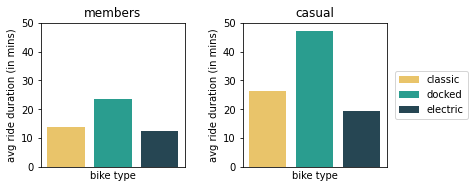

In [17]:
fig = plt.figure()
labels = 'classic', 'docked', 'electric'
colors = ['#e9c46a', '#2a9d8f', '#264653']

ax1 = fig.add_subplot(121, box_aspect = 1)
for index in range(0,ride_length_rideable_type_members_mean.size):
    ax1.bar(index, ride_length_rideable_type_members_mean.iloc[index], color = colors[index], label = labels[index])
    plt.xticks(ticks=[])
    plt.xlabel('bike type')
    plt.yticks([0,10,20,30,40,50])
    plt.ylabel('avg ride duration (in mins)')
    plt.title('members')
    
ax2 = fig.add_subplot(122, box_aspect = 1)
for index in range(0,ride_length_rideable_type_casual_mean.size):
    plt.bar(index, ride_length_rideable_type_casual_mean.iloc[index], color = colors[index], label = labels[index])
    plt.xticks(ticks=[])
    plt.xlabel('bike type')
    plt.yticks([0,10,20,30,40,50])
    plt.ylabel('avg ride duration (in mins)')
    plt.title('casual')

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
# legend
fig.legend(labels, loc ='center right', bbox_to_anchor=(1.1,0.5))
plt.show()


In [18]:
# avg # of rides per month members
df = trip_data_all['started_at'].loc[trip_data_all['member_casual'] == 'member']
number_of_rides_per_month_members = df.groupby([(pd.DatetimeIndex(df).year),(pd.DatetimeIndex(df).month)]).count()
print(number_of_rides_per_month_members.to_string(header=False))

2020        4              61148
            5             113365
            6             188287
            7             282184
            8             332700
            9             302266
            10            243641
            11            171617
            12            101493
2021        1              78717
            2              39491
            3             144463
            4             200629
            5             274717
            6             358914
            7             380354
            8             391681
            9             392257
            10            373984
            11            253049
            12            177802
2022        1              85250
            2              94193
            3             194160
            4             244832
            5             354443
            6             400153


In [19]:
# avg # of rides per month casual users
df = trip_data_all['started_at'].loc[trip_data_all['member_casual'] == 'casual']
number_of_rides_per_month_casual = df.groupby([(pd.DatetimeIndex(df).year),(pd.DatetimeIndex(df).month)]).count()
print(number_of_rides_per_month_casual.to_string(header=False))

2020        4              23628
            5              86909
            6             154718
            7             269296
            8             289661
            9             230692
            10            145012
            11             88099
            12             30080
2021        1              18117
            2              10131
            3              84033
            4             136601
            5             256916
            6             370681
            7             442056
            8             412671
            9             363890
            10            257242
            11            106929
            12             69738
2022        1              18520
            2              21416
            3              89882
            4             126417
            5             280415
            6             369051


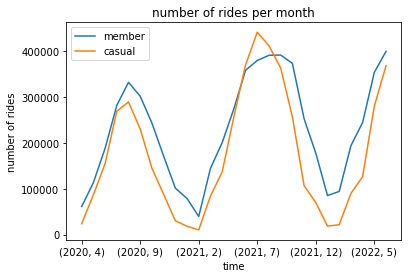

In [20]:
number_of_rides_per_month_members.plot(label='member')
number_of_rides_per_month_casual.plot(label='casual')
plt.xlabel('time')
plt.ylabel('number of rides')
plt.title('number of rides per month')
plt.legend()
plt.show()

## 6. Findings and Recommendations

The analysis revealed insights into *how casual riders and annual members use Cyclistic bikes differently*:
* Annual members also use 33% more Cyclistic bikes on a weekday, suggesting that they commute by bike.
* Average duration of trip is longer on a weekday for casual users.
* Annual members use more traditional bikes while the distribution is more equal among casual users:
    * more casual users use docked bikes when compared to annual members
* Casual members use docked bikes for trips with avg duration 40+ minutes, 2 times as much compare to classic and electric bikes
* Both types of members ride more during the warmer months

To better understand why casual users use more docked bikes than classic bikes, (i) the location of where bikes are picked up and dropped off and (ii) the distribution of docking stations should be examined.

Based on the current findings, my top recommendations for our marketing strategy to convert casual riders into annual members are:

 | Recommendation | Description
 |:----          |:----
 |1. Blog post to promote the benefits of commute by bike | Since more Cyclistic annual members use bikes on weekdays, we assume that they commute by bike. To encourage more casual users to commute by bike, we can post **regular blog posts** on the benefits of commute by bike. For example, getting a workout with the gym, avoiding traffic, boosting happiness level and reducing stress and anxiety. [Source](https://thriveglobal.com/stories/16-benefits-of-biking-to-work/)
 |2. Suggest bike trips of ~30 minutes | As the average bike ride for casual users is around 30 minutes and casual users use more docked bikes when compared to members, bike routes of that duration can be suggested to users based on their location as well as between docking stations.
